# Data Analytics for Gamified To Do List

In [51]:
import pandas as pd

In [52]:
import os
import pandas as pd
from class_profile import Profile
from file_functions import append_dict_json, read_file, sort_json, load_file
from data_functions import convert_dataframe

In [53]:
joshua = Profile("Joshua", 0, 1)
data = load_file(joshua.name)
df = convert_dataframe(data)

In [54]:
print("Duplicated Rows: ", df.duplicated().sum())

Duplicated Rows:  0


In [55]:
df

,category,difficulty,description,points,date,status
0,Personal,2,journal,10,2024-12-6,completed
1,Personal,1,type 10,5,2024-12-6,completed
2,Household,2,refill water,10,2024-12-6,completed
3,Household,1,wash dishes,5,2024-12-6,completed
4,Personal,3,program,15,2024-12-6,pending
5,Personal,2,isc2,10,2024-12-6,pending
6,Personal,2,organize notepads,10,2024-12-6,pending
7,Personal,2,organize files,10,2024-12-6,pending
8,Personal,3,file of first steps,15,2024-12-6,pending
9,Personal,1,shower,5,2024-12-6,pending


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     34 non-null     object
 1   difficulty   34 non-null     int64 
 2   description  34 non-null     object
 3   points       34 non-null     int64 
 4   date         34 non-null     object
 5   status       34 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


In [57]:
df.drop_duplicates(inplace=True)

In [58]:
print("Unique Values in Description Column:", len(df['description'].unique()))

Unique Values in Description Column: 19


In [59]:
df['description'].value_counts()

description
journal                        2
type 10                        2
refill water                   2
program                        2
isc2                           2
organize notepads              2
organize files                 2
shower                         2
file of first steps            2
toothbrush                     2
read book                      2
haircut                        2
budget management              2
duolingo                       2
google slides                  2
wash dishes                    1
cut nails                      1
photostudio for new profile    1
hannah picture edits           1
Name: count, dtype: int64

In [60]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [61]:
df['status'].unique()

array(['completed', 'pending'], dtype=object)

In [62]:
average_completion_per_date = df.groupby('date')['status'].value_counts()
average_completion_per_date

date        status   
2024-12-06  pending      11
            completed     8
2024-12-07  completed     8
            pending       7
Name: count, dtype: int64

In [63]:
average_points_per_completion_date = df.groupby('status')['points'].sum()
average_points_per_completion_date

status
completed    120
pending      200
Name: points, dtype: int64

In [64]:
test_df = df.groupby('description')['status'].value_counts()
test_df

description                  status   
budget management            pending      2
cut nails                    completed    1
duolingo                     completed    2
file of first steps          pending      2
google slides                pending      2
haircut                      completed    1
                             pending      1
hannah picture edits         completed    1
isc2                         completed    1
                             pending      1
journal                      completed    2
organize files               pending      2
organize notepads            pending      2
photostudio for new profile  pending      1
program                      pending      2
read book                    pending      2
refill water                 completed    2
shower                       completed    1
                             pending      1
toothbrush                   completed    2
type 10                      completed    2
wash dishes                  complete

In [65]:
df[(df['status'] == 'completed') & (df['date'] == '6/12/2024')].value_counts()

Series([], Name: count, dtype: int64)

# Data Visualization

In [66]:
import matplotlib.pyplot as plt

In [67]:
df

,category,difficulty,description,points,date,status
0,Personal,2,journal,10,2024-12-06,completed
1,Personal,1,type 10,5,2024-12-06,completed
2,Household,2,refill water,10,2024-12-06,completed
3,Household,1,wash dishes,5,2024-12-06,completed
4,Personal,3,program,15,2024-12-06,pending
5,Personal,2,isc2,10,2024-12-06,pending
6,Personal,2,organize notepads,10,2024-12-06,pending
7,Personal,2,organize files,10,2024-12-06,pending
8,Personal,3,file of first steps,15,2024-12-06,pending
9,Personal,1,shower,5,2024-12-06,pending


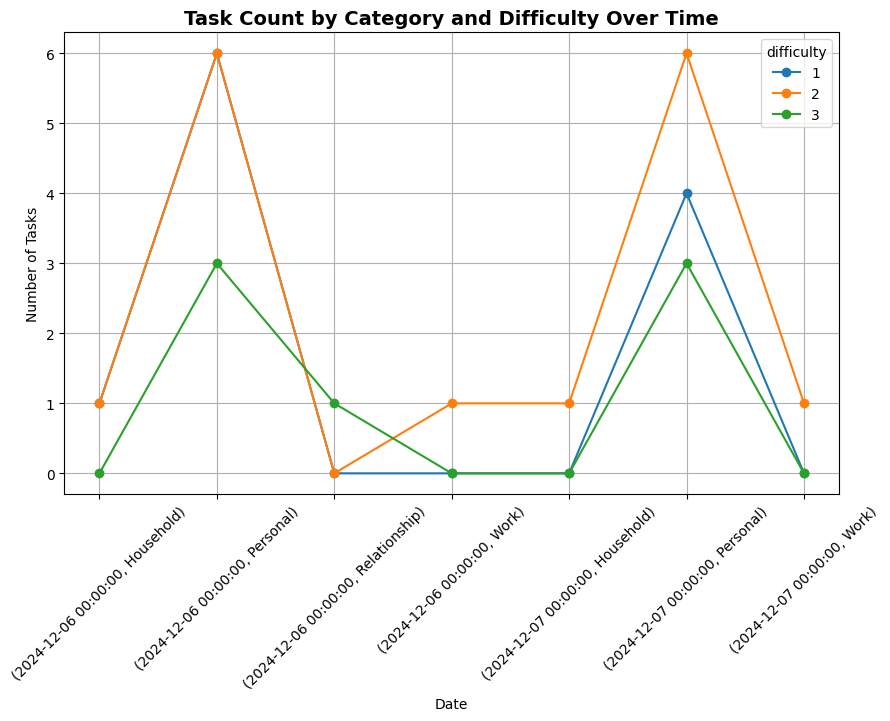

In [68]:
# Group by date, category, and difficulty, and count the number of tasks
tasks_by_category_diff = df.groupby(['date', 'category', 'difficulty']).size().unstack(fill_value=0)

# Plot each difficulty level as a line in each category
tasks_by_category_diff.plot(kind='line', marker='o', figsize=(10, 6))

# Adding a title and labels
plt.title("Task Count by Category and Difficulty Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Number of Tasks")

# Display the line graph
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [69]:
test_df = df.groupby('category')['difficulty'].value_counts().sum()
test_df

np.int64(34)

In [70]:
difficulty_counts = pd.DataFrame()
difficulty_counts = df['difficulty'].value_counts()
difficulty_counts


difficulty
2    16
1    11
3     7
Name: count, dtype: int64

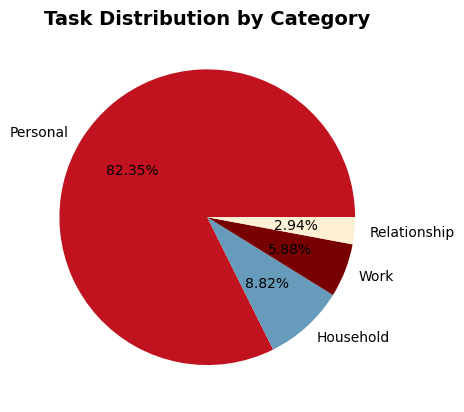

In [71]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create the pie chart for categories
plt.pie(category_counts, labels=category_counts.index, autopct="%.2f%%", colors=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"], textprops={'color':'black'})

# Adding a title
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

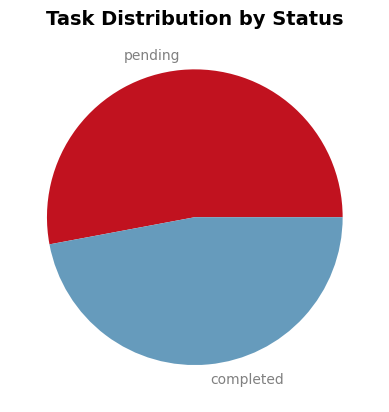

In [72]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create the pie chart for task status
plt.pie(status_counts, labels=status_counts.index, colors=["#c1121f", "#669bbc"], textprops={'color':'gray'})

# Adding a title
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")

# Display the pie chart
plt.show()

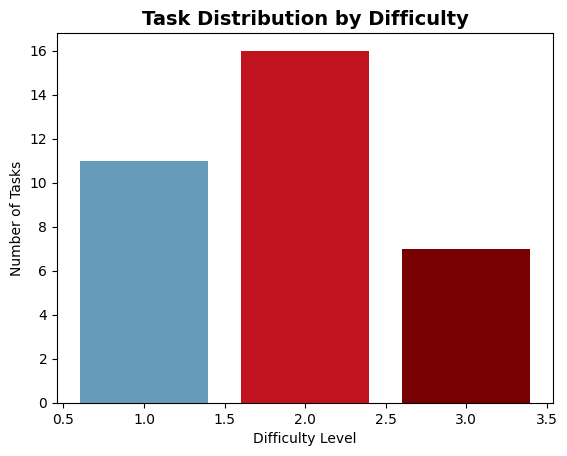

In [73]:
# Count the number of tasks for each difficulty level
difficulty_counts = df['difficulty'].value_counts()

# Create a bar graph for difficulty
plt.bar(difficulty_counts.index, difficulty_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Difficulty", fontsize=14, fontweight="bold")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

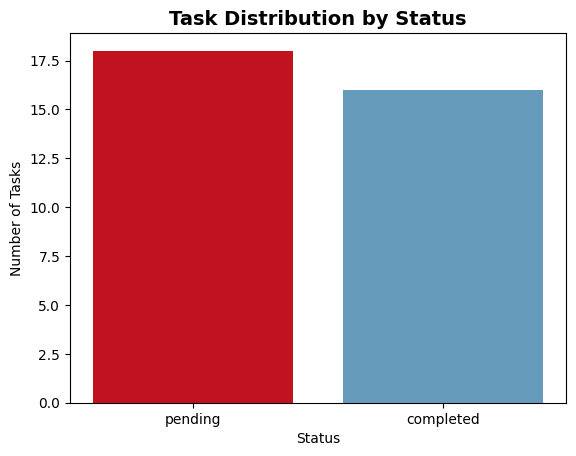

In [74]:
# Count the number of tasks for each status
status_counts = df['status'].value_counts()

# Create a bar graph for task status
plt.bar(status_counts.index, status_counts.values, color=["#c1121f", "#669bbc"])

# Adding a title and labels
plt.title("Task Distribution by Status", fontsize=14, fontweight="bold")
plt.xlabel("Status")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()

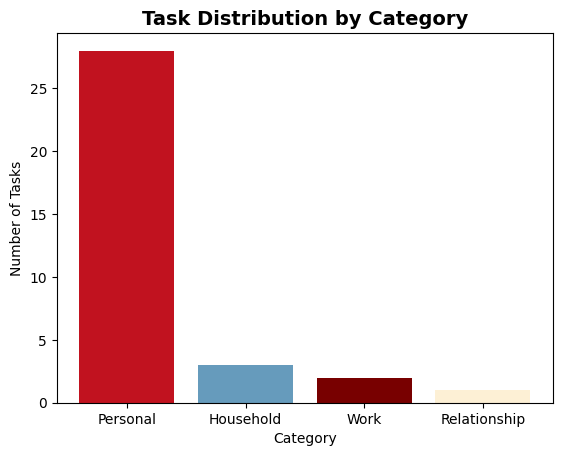

In [75]:
# Count the number of tasks for each category
category_counts = df['category'].value_counts()

# Create a bar graph for categories
plt.bar(category_counts.index, category_counts.values, color=["#c1121f", "#669bbc", "#780000", "#fdf0d5", "#003049"])

# Adding a title and labels
plt.title("Task Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Number of Tasks")

# Display the bar chart
plt.show()